In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/projeler/support vector machine

/content/drive/My Drive/Colab Notebooks/projeler/support vector machine


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

#### 50 satır ve iki sınıfı olan x ve y verilerini oluşturuyoruz

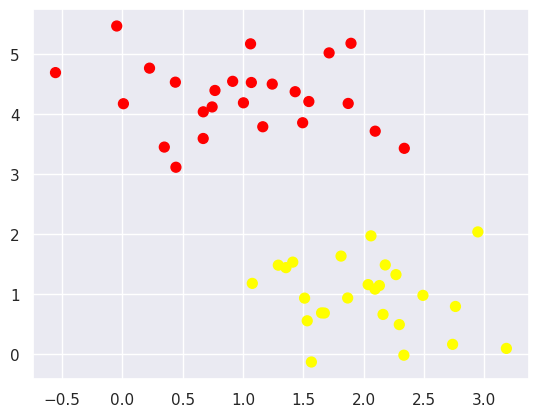

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

### Sınıflandırma yaparken iki veri arasında sonsuz ayrım yapılabilir
### Svm'nin amacı en optimal doğruyu çizmek

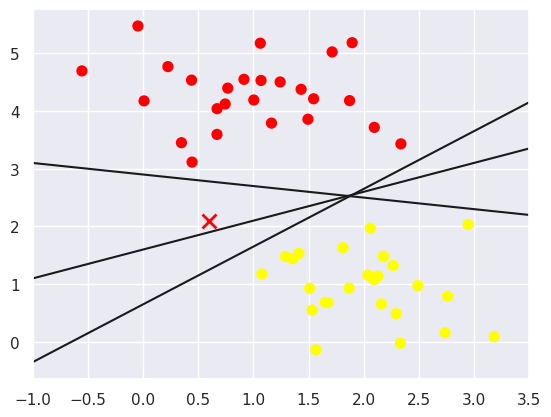

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

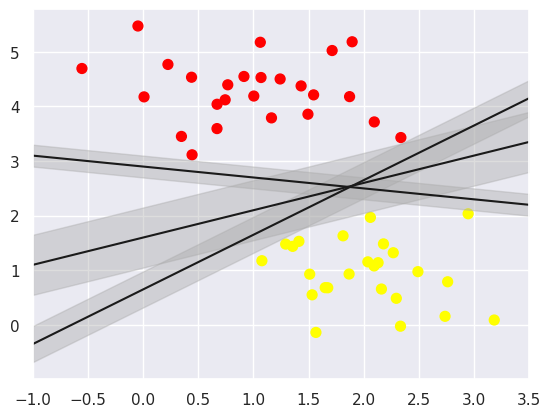

In [7]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [8]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)


SVC(C=10000000000.0, kernel='linear')

In [9]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """2 boyutlu SVC için karar işlevini çizin"""

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    print(ax)

    # modeli değerlendirmek için ızgara oluştur
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    print(y)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # karar sınırı ve marjları çizmek
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot destek vektörleri
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='red');

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Axes(0.125,0.11;0.775x0.77)
[-0.41872382 -0.20584126  0.0070413   0.21992386  0.43280643  0.64568899
  0.85857155  1.07145411  1.28433668  1.49721924  1.7101018   1.92298436
  2.13586693  2.34874949  2.56163205  2.77451461  2.98739718  3.20027974
  3.4131623   3.62604486  3.83892743  4.05180999  4.26469255  4.47757511
  4.69045768  4.90334024  5.1162228   5.32910536  5.54198793  5.75487049]


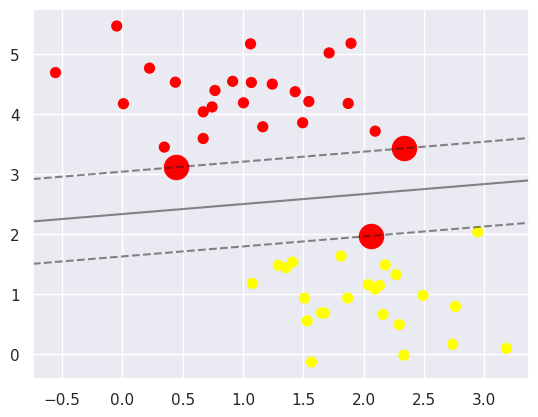

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [11]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

(60, 2)
Axes(0.0625,0.11;0.422619x0.77)
[-1.         -0.75862069 -0.51724138 -0.27586207 -0.03448276  0.20689655
  0.44827586  0.68965517  0.93103448  1.17241379  1.4137931   1.65517241
  1.89655172  2.13793103  2.37931034  2.62068966  2.86206897  3.10344828
  3.34482759  3.5862069   3.82758621  4.06896552  4.31034483  4.55172414
  4.79310345  5.03448276  5.27586207  5.51724138  5.75862069  6.        ]
(120, 2)
Axes(0.527381,0.11;0.422619x0.77)
[-1.         -0.75862069 -0.51724138 -0.27586207 -0.03448276  0.20689655
  0.44827586  0.68965517  0.93103448  1.17241379  1.4137931   1.65517241
  1.89655172  2.13793103  2.37931034  2.62068966  2.86206897  3.10344828
  3.34482759  3.5862069   3.82758621  4.06896552  4.31034483  4.55172414
  4.79310345  5.03448276  5.27586207  5.51724138  5.75862069  6.        ]


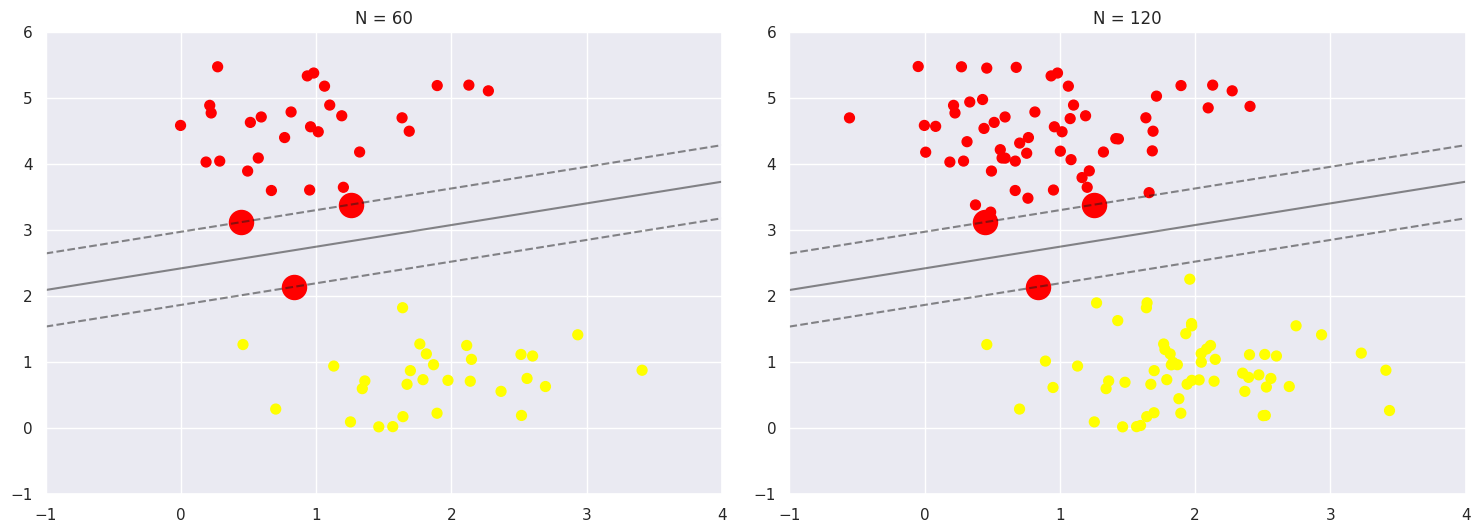

In [12]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)

    X = X[:N]
    y = y[:N]
    print(X.shape)
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

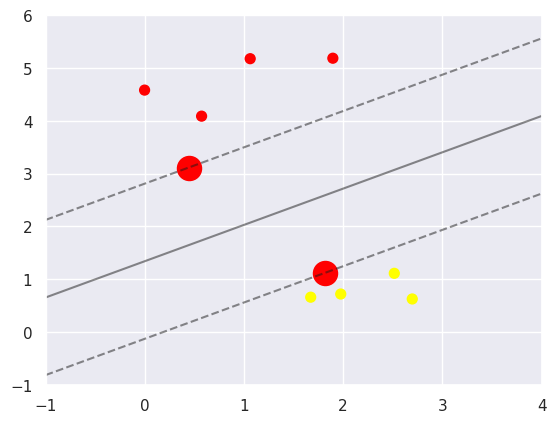

In [13]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

Axes(0.125,0.11;0.775x0.77)
[-1.18576804 -1.1039597  -1.02215135 -0.94034301 -0.85853466 -0.77672632
 -0.69491797 -0.61310962 -0.53130128 -0.44949293 -0.36768459 -0.28587624
 -0.2040679  -0.12225955 -0.0404512   0.04135714  0.12316549  0.20497383
  0.28678218  0.36859052  0.45039887  0.53220722  0.61401556  0.69582391
  0.77763225  0.8594406   0.94124895  1.02305729  1.10486564  1.18667398]


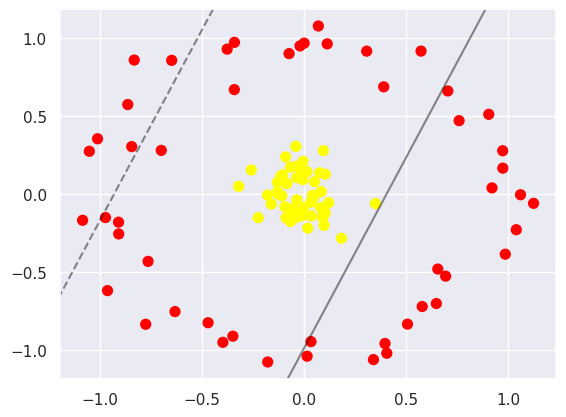

In [15]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [16]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

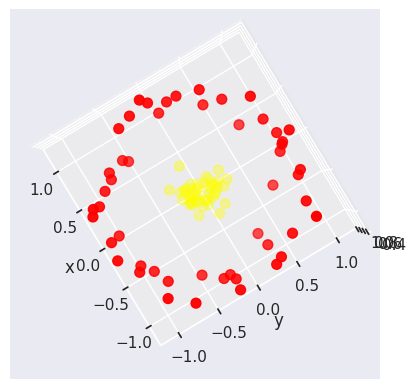

In [17]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

In [18]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Axes(0.125,0.11;0.775x0.77)
[-1.18576804 -1.1039597  -1.02215135 -0.94034301 -0.85853466 -0.77672632
 -0.69491797 -0.61310962 -0.53130128 -0.44949293 -0.36768459 -0.28587624
 -0.2040679  -0.12225955 -0.0404512   0.04135714  0.12316549  0.20497383
  0.28678218  0.36859052  0.45039887  0.53220722  0.61401556  0.69582391
  0.77763225  0.8594406   0.94124895  1.02305729  1.10486564  1.18667398]


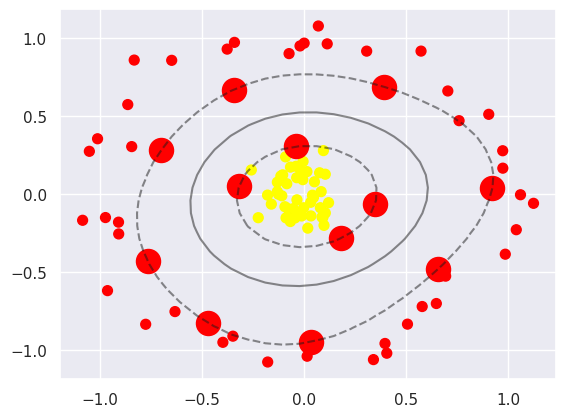

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

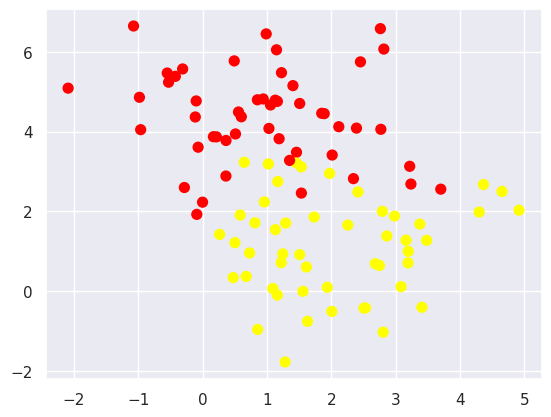

In [20]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Axes(0.0625,0.11;0.422619x0.77)
[-1.21833219 -0.96246966 -0.70660714 -0.45074462 -0.1948821   0.06098043
  0.31684295  0.57270547  0.82856799  1.08443052  1.34029304  1.59615556
  1.85201808  2.10788061  2.36374313  2.61960565  2.87546817  3.1313307
  3.38719322  3.64305574  3.89891827  4.15478079  4.41064331  4.66650583
  4.92236836  5.17823088  5.4340934   5.68995592  5.94581845  6.20168097]
Axes(0.527381,0.11;0.422619x0.77)
[-1.21833219 -0.96246966 -0.70660714 -0.45074462 -0.1948821   0.06098043
  0.31684295  0.57270547  0.82856799  1.08443052  1.34029304  1.59615556
  1.85201808  2.10788061  2.36374313  2.61960565  2.87546817  3.1313307
  3.38719322  3.64305574  3.89891827  4.15478079  4.41064331  4.66650583
  4.92236836  5.17823088  5.4340934   5.68995592  5.94581845  6.20168097]


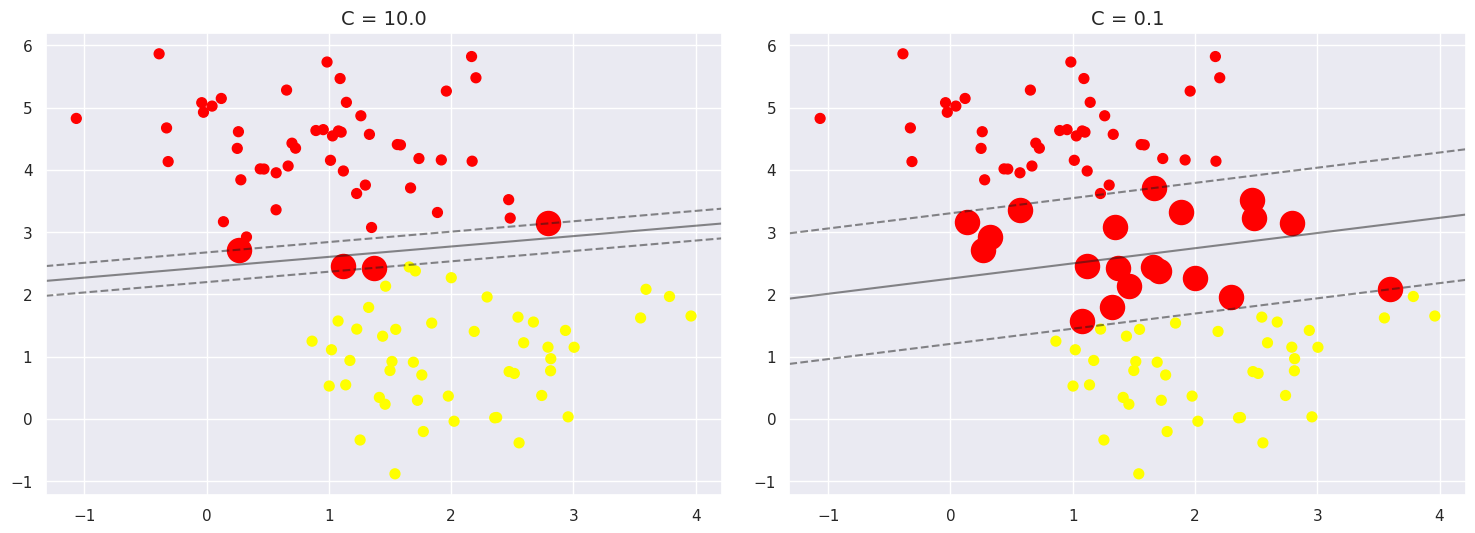

In [21]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)